In [1]:
%matplotlib inline
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
mpl.rcParams['figure.figsize'] = [12, 6]

def parse_timestamp(s):
    return datetime.datetime.strptime(s, '%Y%m%d__%H_%M_%S')

def get_recordings():
    return sorted(glob('../recordings/*.txt'))

def get_recording(file):
    with open(file) as f:
        start, end = f.readline()[1:].strip().split(',')
        start= parse_timestamp(start)
        end = parse_timestamp(end)
        values = [int(x) for x in f.readlines()]
        return (start, end, values)

recording_file = get_recordings()[-1]
start, end, recording = get_recording(recording_file)
num_values = len(recording)
duration = end - start
sampling_frequency = int(num_values / duration.seconds) 

In [ ]:
rolling = 1000

for x in 

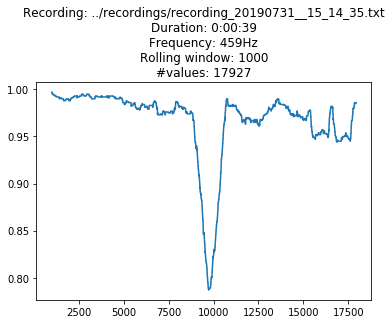

In [3]:
rolling = 1000

fig, ax = plt.subplots()
ax.set_title(f'Recording: {recording_file}\nDuration: {duration}\nFrequency: {sampling_frequency}Hz\nRolling window: {rolling}\n#values: {len(recording)}')
pd.Series(recording).rolling(rolling).mean().plot(kind='line', ax=ax)
